In [1]:
import pandas as pd
import glob
import json
import ntpath
from datetime import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%config InlineBackend.figure_format = 'retina'

In [158]:
df = pd.read_csv("chodakowska-comments.csv")
df.dropna(inplace=True)
df.ts = pd.to_datetime(df.ts)
df.spam = df.spam.astype('bool')
df.owner_verified = df.owner_verified.astype('bool')
df.viewer_has_liked = df.viewer_has_liked.astype('bool')
df.like_count = df.like_count.astype('int')
df.comments_threads.fillna(0, inplace=True)
df.comments_threads = df.comments_threads.astype('int')

/Users/marian/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,5,6,7,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [159]:
df.shape

(1354457, 10)

In [160]:
df.sample(n=5)

,short_code,id,text,ts,owner,owner_verified,viewer_has_liked,like_count,comments_threads,spam
1272173,CCG4F4OnYX4,17844497105258058,"Zaliczone i jest ,,MOC"". A po ledwo, ledwo był...",2020-07-01 21:19:12,katy.jakuza,False,False,0,0,False
1288449,CCgCdDanrCq,17853821819114051,"Jestem ❤️❤️❤️, staram się. Te lajfy są SUPER!!...",2020-07-11 20:31:36,tynkairodzinka,False,False,0,0,False
562688,BVhgbq6FIWQ,17885648287055786,Ja również mam😍,2017-06-20 09:50:43,lady_marsi,False,False,0,0,False
757697,BgeiF00lJ_X,17859439393228307,@chodakowskaewa a gdzie treningi na next week 🙈,2018-03-18 21:54:57,olga_.zajac,False,False,0,0,False
777948,BhgLqdfFQI,17918754868088099,Wielkie wow i ogromne brawa! To sie nazywa sam...,2018-04-13 10:28:24,szarlotaaa,False,False,0,0,False


## TOP20 komentujących

In [161]:
df.groupby('owner').size().sort_values(ascending=False).head(20).to_frame()

,0
owner,
chodakowskaewa,7947
julk_a17,2141
agaa.d,2086
magdalena.leonczak,2007
tinaa_trenuje,1793
ewelinapee,1632
_beata_koktajlowa_dziewczyna,1555
helenaroszak,1552
sikorka470,1508


## TOP20 polubionych komentarzy

In [163]:
df.sort_values('like_count', ascending=False).head(20)

,short_code,id,text,ts,owner,owner_verified,viewer_has_liked,like_count,comments_threads,spam
402438,B9RhVCrnqzE,17852331628880559,Proponowanie barteru zamiast zapłaty przez oso...,2020-03-03 15:05:06,wiki.biank2009,False,False,1559,15,False
1148948,BzFpRaun-DD,17875994986380074,"Ale problem w tym, że to co Ty robisz NIE JEST...",2019-06-24 18:34:51,okiemfizjoterapeuty,False,False,1304,58,False
705416,BeLtIr-lgy7,17895113113141640,"ta pseudo akcja, to nic innego niż zwykły, naj...",2018-01-20 22:35:41,wiskola,False,False,1293,39,False
273373,B4UbGXkHqcK,17868702700514085,Ale Wy ludzie macie dziwaczną mentalność.. Pis...,2019-11-01 14:25:46,mumandwife_,False,False,1245,37,False
1067600,BwUe7kbHlv0,17870246221358638,"Że na świecie są głodne dzieci i umierają, z t...",2019-04-16 16:47:38,martaszymczak,False,False,1177,210,False
402439,B9RhVCrnqzE,17934823573352945,Ten barter to trochę takie żebranie. Pani za s...,2020-03-03 15:05:13,martaciok1,False,False,1110,6,False
402412,B9RhVCrnqzE,18088241086152640,Próbowałem w biedrze opcji ma barter ale kiero...,2020-03-03 14:57:41,polacy_biedacy,False,False,1061,13,False
398392,B9HSJyunzt6,17870681647610032,Dziękuje wszystkim za ogrom wsparcia 🙏🏻 Lefter...,2020-02-28 17:59:46,chodakowskaewa,True,False,1011,32,False
402358,B9RhVCrnqzE,17893980994461204,Bo Pani nie można skrytykować ? Bo jak krytyka...,2020-03-03 15:10:57,soyestella,False,False,931,36,False
943460,BsU8-U5n3_r,17864443555307387,"Kiedyś przeczytałam piękne słowa "" Nie zapomni...",2019-01-07 10:02:44,angelika_matyla,False,False,912,14,False


## Rozkład liczby komentarzy i polubień dla postów  (do 2000)

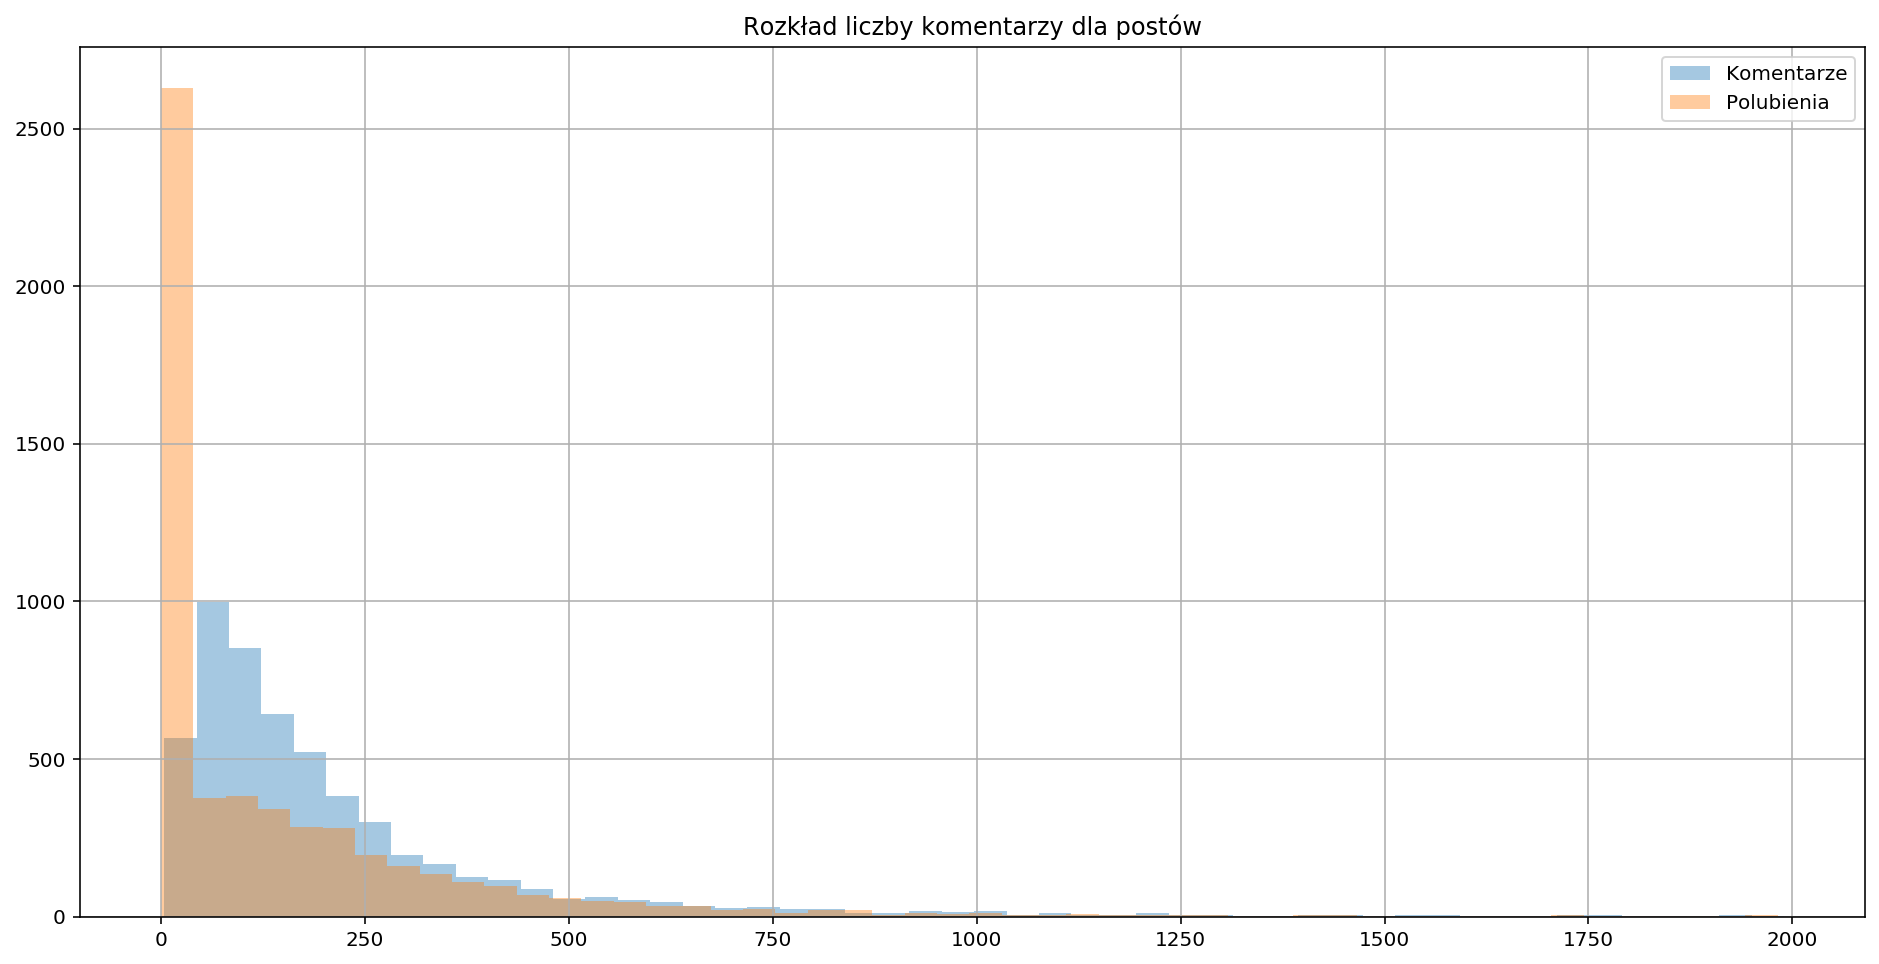

In [164]:
serie1 = df.groupby('short_code').size()
serie1 = serie1[serie1<=2000]

serie2 = df.groupby('short_code')["like_count"].sum()
serie2 = serie2[serie2<=2000]

plt.figure(figsize=(16,8))
sns.distplot( serie1.values, kde=False, label='Komentarze' )
sns.distplot( serie2.values, kde=False, label='Polubienia' )

plt.grid()
plt.legend()
plt.title('Rozkład liczby komentarzy dla postów')
plt.show()

## Rozkład godzinowy komentarzy

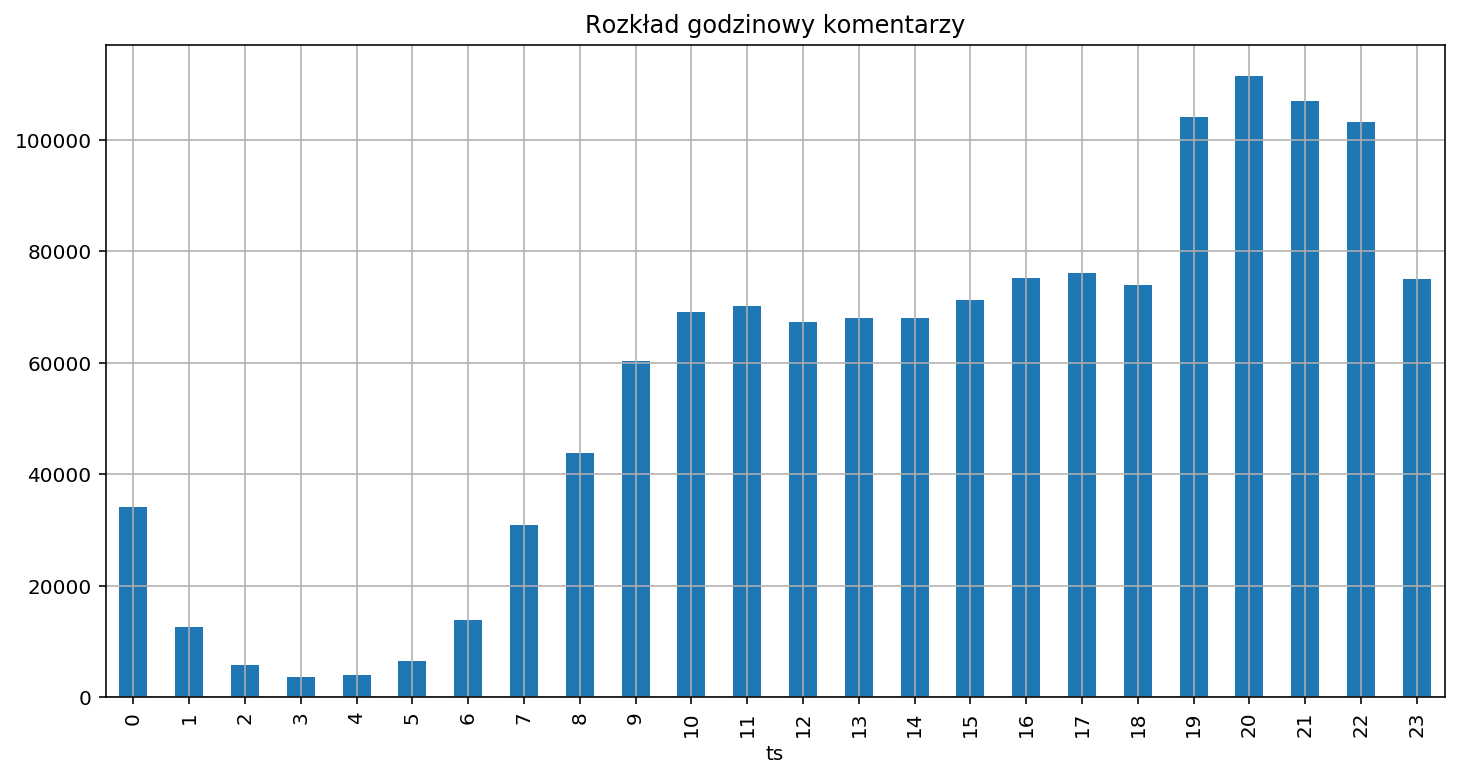

In [165]:
df.groupby(df.ts.dt.hour).size().plot(kind='bar', figsize=(12,6), grid=True)
plt.title('Rozkład godzinowy komentarzy')
plt.show()

## TOP20 komentujących użytkowników zweryfikowanych

In [166]:
df[(df.owner_verified==True)&(df.owner!="chodakowskaewa")].groupby('owner').size().\
            sort_values(ascending=False).head(20).to_frame()

,0
owner,
ally_healthylifestyle,339
m_stylowo,328
wlodarczykpaula,325
zyjeszpl,276
juszczykmartyna,259
paulinakuczynskaa,254
aniagx_,226
szulc_nathalie,219
klaudiasynarska,213


## Lematyzacja treści komentarzy

In [14]:
#!pip install spacy --no-cache-dir 

In [15]:
#!python -m pip install /Users/marian/Downloads/pl_spacy_model-0.1.0.tar.gz --no-cache-dir 

In [167]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk.stem

In [168]:
nltk.download('punkt')
nltk.download('pl196x')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/marian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package pl196x to /Users/marian/nltk_data...
[nltk_data]   Package pl196x is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/marian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marian/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [169]:
import spacy
nlp = spacy.load('pl_spacy_model')

/Users/marian/opt/anaconda3/lib/python3.7/site-packages/spacy/util.py:275: UserWarning: [W031] Model 'pl_model' (0.1.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [170]:
stops = set(nltk.corpus.stopwords.words('polish'))
lematizer = nltk.stem.WordNetLemmatizer()

def lemat_comments(s):
    cache = dict()
    result = []
    print("RegexpTokenizer")
    tokenizer = RegexpTokenizer(r'\w+')
    print("Tokenizer")
    text = tokenizer.tokenize(s.lower())
    words = nltk.word_tokenize(" ".join(text))
    print("Stopwords")
    words = [word for word in words if word not in stops and len(word)>=3]
    total = 0
    print("total=",len(words))
    for word in words:
        total+=1
        if total%1000==0:
            print(".", end='')
        
        if cache.get(word):
            token = cache.get(word)
            #print("x",end='')
            result.append(token.lemma_)
        else:
            doc = nlp(word)
            #print("+",end='')
            for token in doc:
                cache[word] = token
                result.append(token.lemma_)

    return result

In [171]:
s = " ".join(df.sample(n=5000).text.to_list())
lemats = lemat_comments(s)

RegexpTokenizer
Tokenizer
Stopwords
total= 26592
..........................

In [172]:
lemats

['ewciu',
 'piekna',
 'ewku',
 'kochany',
 'przesyłać',
 'siła',
 'vanesski',
 'modlić',
 'zaliczyć',
 'uwielbiać',
 'kobieta',
 'pokazywać',
 'ciało',
 'chociaż',
 'obserwować',
 'cichu',
 'cichu',
 'cały',
 'serducho',
 'obecny',
 'obecny',
 'skończyć',
 'skalpel',
 'wyzwanie',
 'kochać',
 'ewka',
 'cudowny',
 'miejsce',
 'cudoooooo',
 'ostatnio',
 'głowa',
 'top',
 'zaraz',
 'maluch',
 'zrobić',
 'inhalacja',
 'dać',
 'lek',
 'wiosna',
 'udać',
 'wstać',
 'powiedzieć',
 'przyjemny',
 'poranek',
 'piękny',
 'strój',
 'happy',
 'earth',
 'day',
 'skalpel',
 'obciążenie',
 'minuta',
 'rewolucja',
 'płaski',
 'brzucho',
 'robić',
 'fotka',
 'telefon',
 'why',
 'byłam',
 'restauracja',
 'często',
 'przechadzać',
 'tamtędy',
 'miły',
 'dzień',
 'londynie',
 'przypadek',
 'osoba',
 'mówić',
 'dać',
 'rada',
 'podjąć',
 'wyzwanie',
 'mądry',
 'słowo',
 'ewka',
 'dobra',
 'stylóweczka',
 'ewcia',
 'super',
 'gin',
 'tonik',
 'dietetyczny',
 'matka',
 'tłumaczenie',
 'spowiedź',
 'zrozumieć',

In [173]:
df_lemats = pd.DataFrame(lemats, columns=['word'])

In [174]:
top_words = list(df_lemats.groupby('word').size().sort_values(ascending=False).head(40).index)

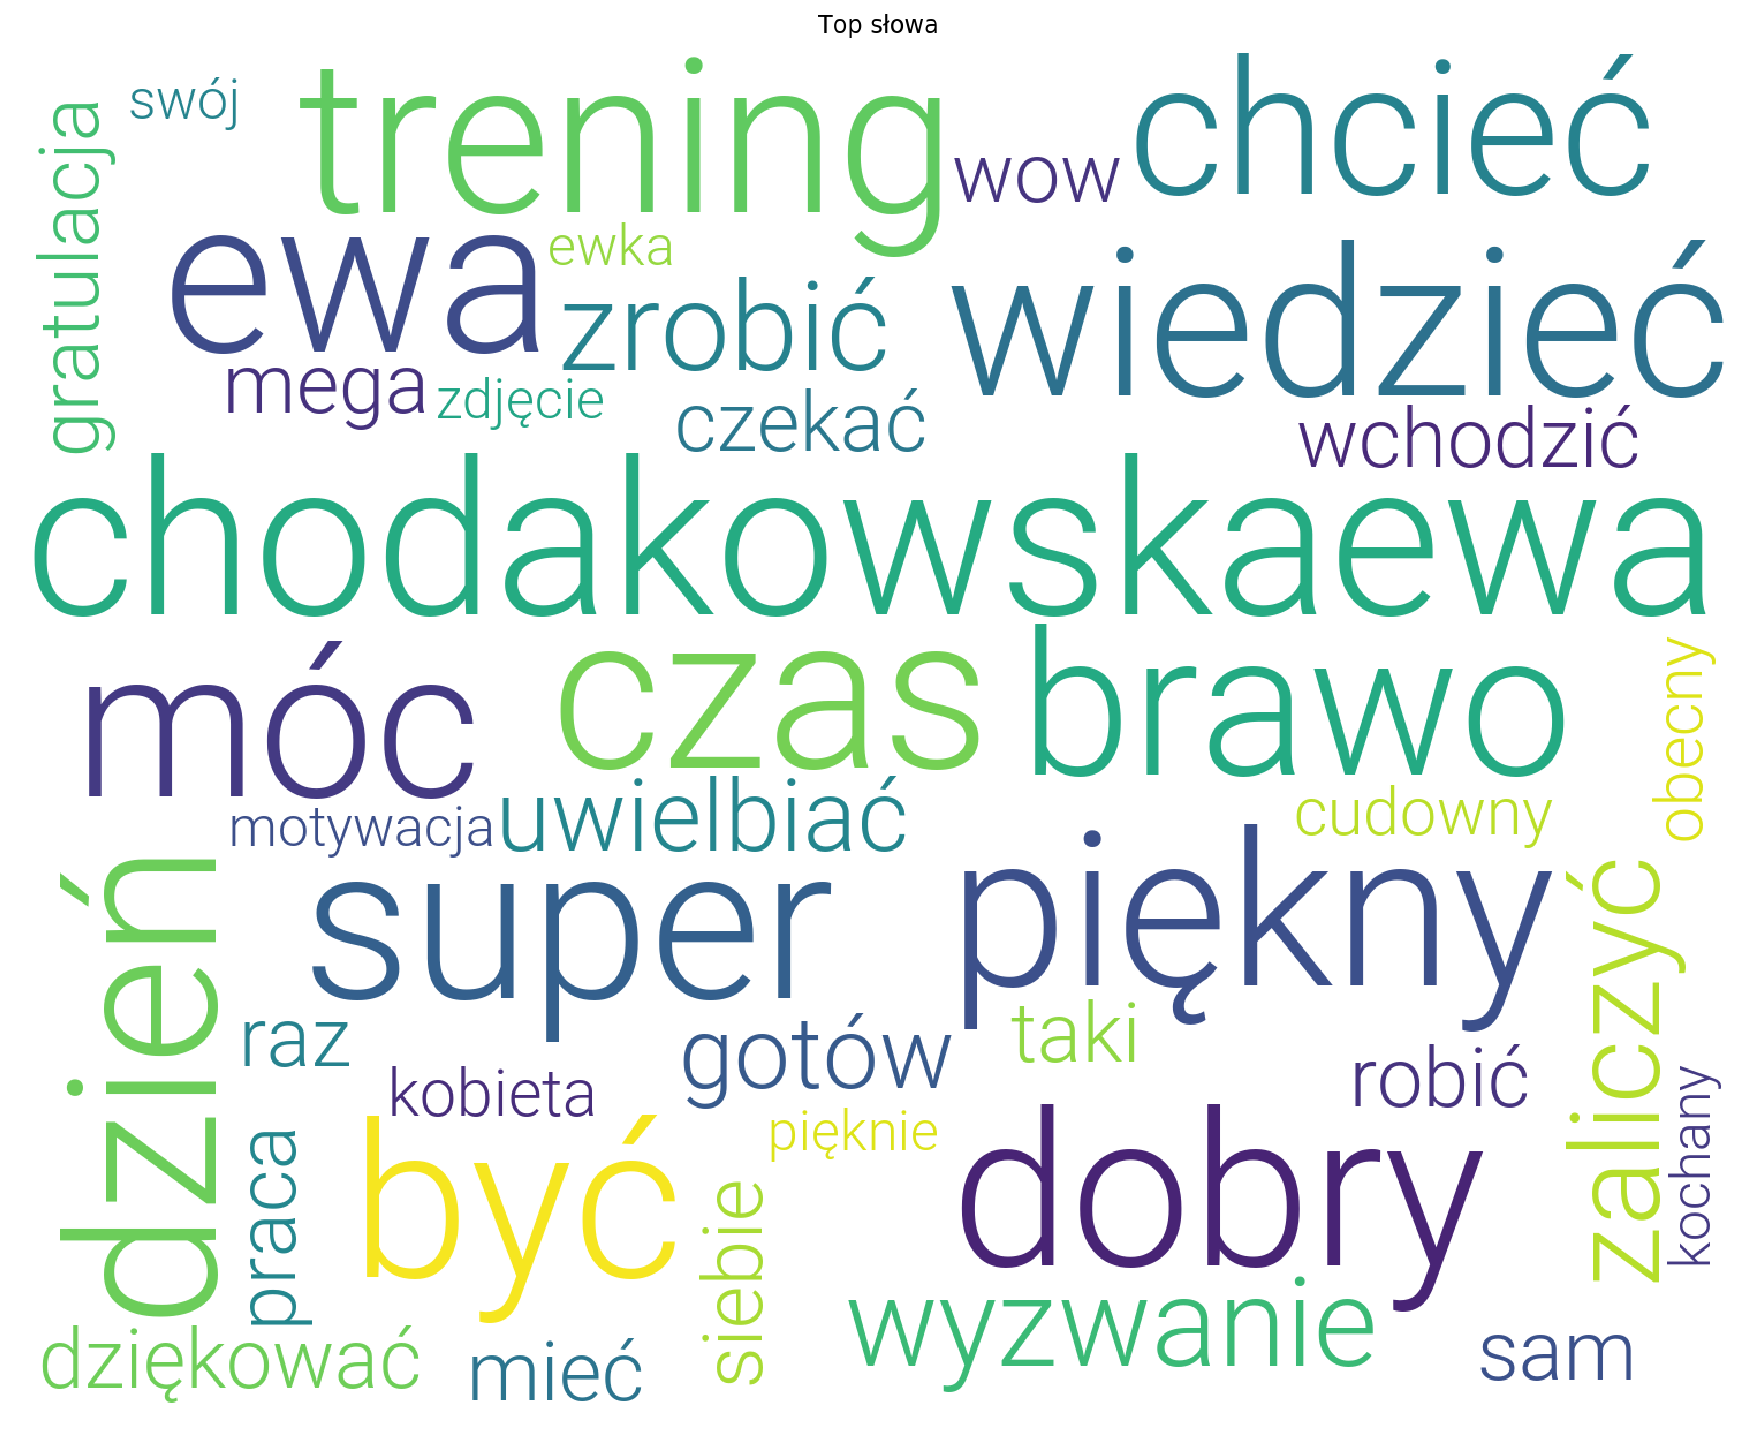

In [175]:
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white', font_path='Roboto-Light.ttf', margin=10, scale=1.5,
                min_font_size = 20).generate(" ".join(top_words)) 
  
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Top słowa')

plt.show() 

## Reakcja użytkowników na publikację komentarzy (czas publikacji komentarzy po publikacji postu) 

In [176]:
df_posts = pd.read_csv("chodakowska.csv", parse_dates=['ts'], usecols=['shortcode','ts'])
df_posts.columns=['short_code','post_ts']

In [177]:
df_result = pd.merge(df, df_posts, how='left', on='short_code', indicator=True)
df_result["ts_diff"] = (df_result.ts - df_result.post_ts).astype('timedelta64[m]')
df_result = df_result[(df_result._merge=="both")&(df_result.ts_diff>0)]
df_result.sample(n=5)

,short_code,id,text,ts,owner,owner_verified,viewer_has_liked,like_count,comments_threads,spam,post_ts,_merge,ts_diff
550874,BTQpdNzlc__,17855056975153621,Było cudownie ❤,2017-04-24 10:32:40,karolina.przewoznik,False,False,0,0,False,2017-04-24 09:42:50,both,49.0
1200832,CAigURCnT0F,17864510839838087,"Obecna, niech będzie 🔥❤️❤️❤️",2020-05-23 21:13:33,fitnowe_love,False,False,0,0,False,2020-05-23 19:42:02,both,91.0
1263031,CCA1yqXHqtT,17889984409570269,OBECNA❤️,2020-06-29 16:09:10,iza.pogroszewska,False,False,0,0,False,2020-06-29 10:58:18,both,310.0
300312,B5ST4WWHFM6,17872678552507728,Zdecydowanie na to czekałam 😍,2019-11-25 13:14:04,peach_wife,False,False,0,0,False,2019-11-25 12:05:45,both,68.0
275235,B4Zr9qXnybf,18110730088013970,Biorę udział 😁 będzie 🍑jak marzenie 😁,2019-11-04 15:01:45,magda.lena_de,False,False,0,0,False,2019-11-03 12:19:29,both,1602.0


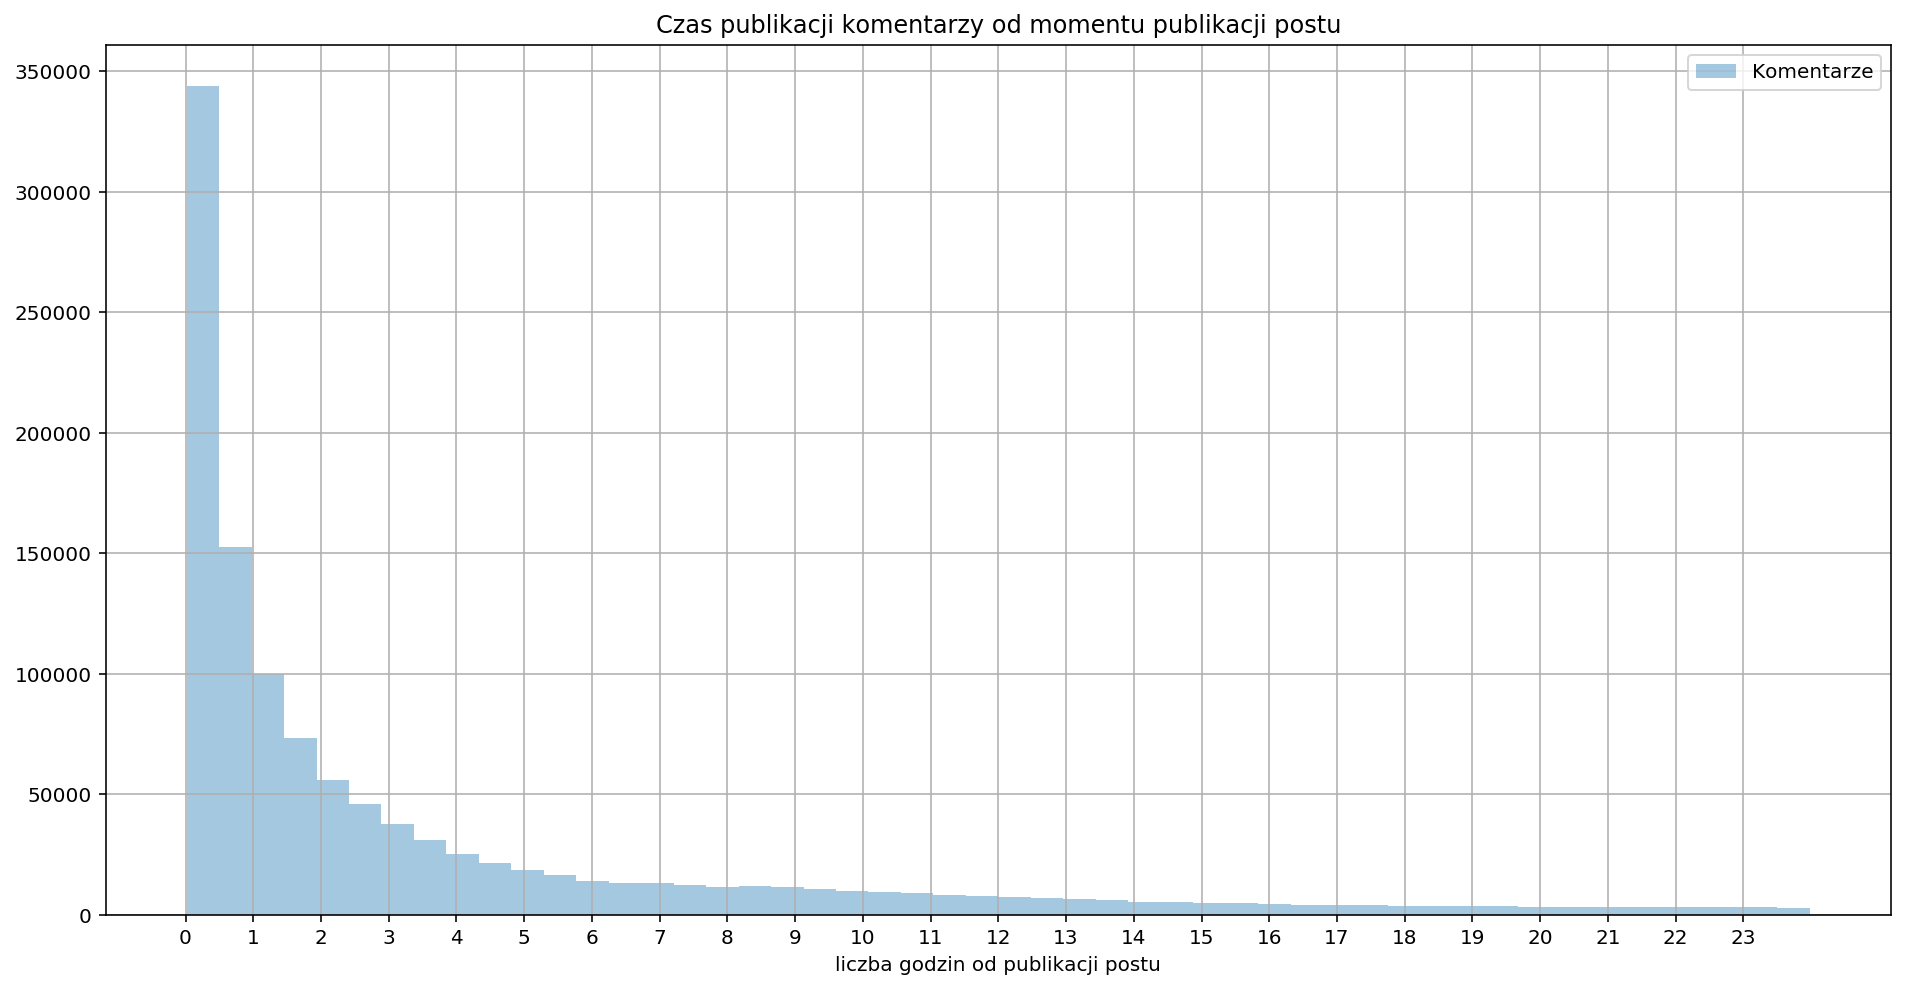

In [178]:
plt.figure(figsize=(16,8))
MAX = 60*24 # 60min*24 = 1doba
sns.distplot( df_result[df_result.ts_diff<MAX].ts_diff, kde=False, label='Komentarze' )

plt.grid()
plt.legend()
plt.title('Czas publikacji komentarzy od momentu publikacji postu')
plt.xticks(range(0,MAX,60), range(0, int(MAX/60) ))
plt.xlabel('liczba godzin od publikacji postu')
plt.show()


In [179]:
import emoji
from emosent import get_emoji_sentiment_rank

In [180]:
def extract_emojis(s):
    return [c for c in s if c in emoji.UNICODE_EMOJI]

In [181]:
def calc_emojis(s):
    emos = [c for c in s if c in emoji.UNICODE_EMOJI]
    if emos:
        result = {'negative': 0.0, 'neutral': 0.0, 'positive': 0.0, }
        for e in emos:
            try:
                sent = get_emoji_sentiment_rank(e)
                result["negative"] += sent["negative"]
                result["neutral"] += sent["neutral"]
                result["positive"] += sent["positive"]
            except:
                pass
        sum_ = sum(result.values())
        if sum_>0:
            result["negative"] /= sum_
            result["neutral"] /= sum_
            result["positive"] /= sum_
        return max(result, key=result.get)
        #return result
    else:
        return pd.np.NaN

/Users/marian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


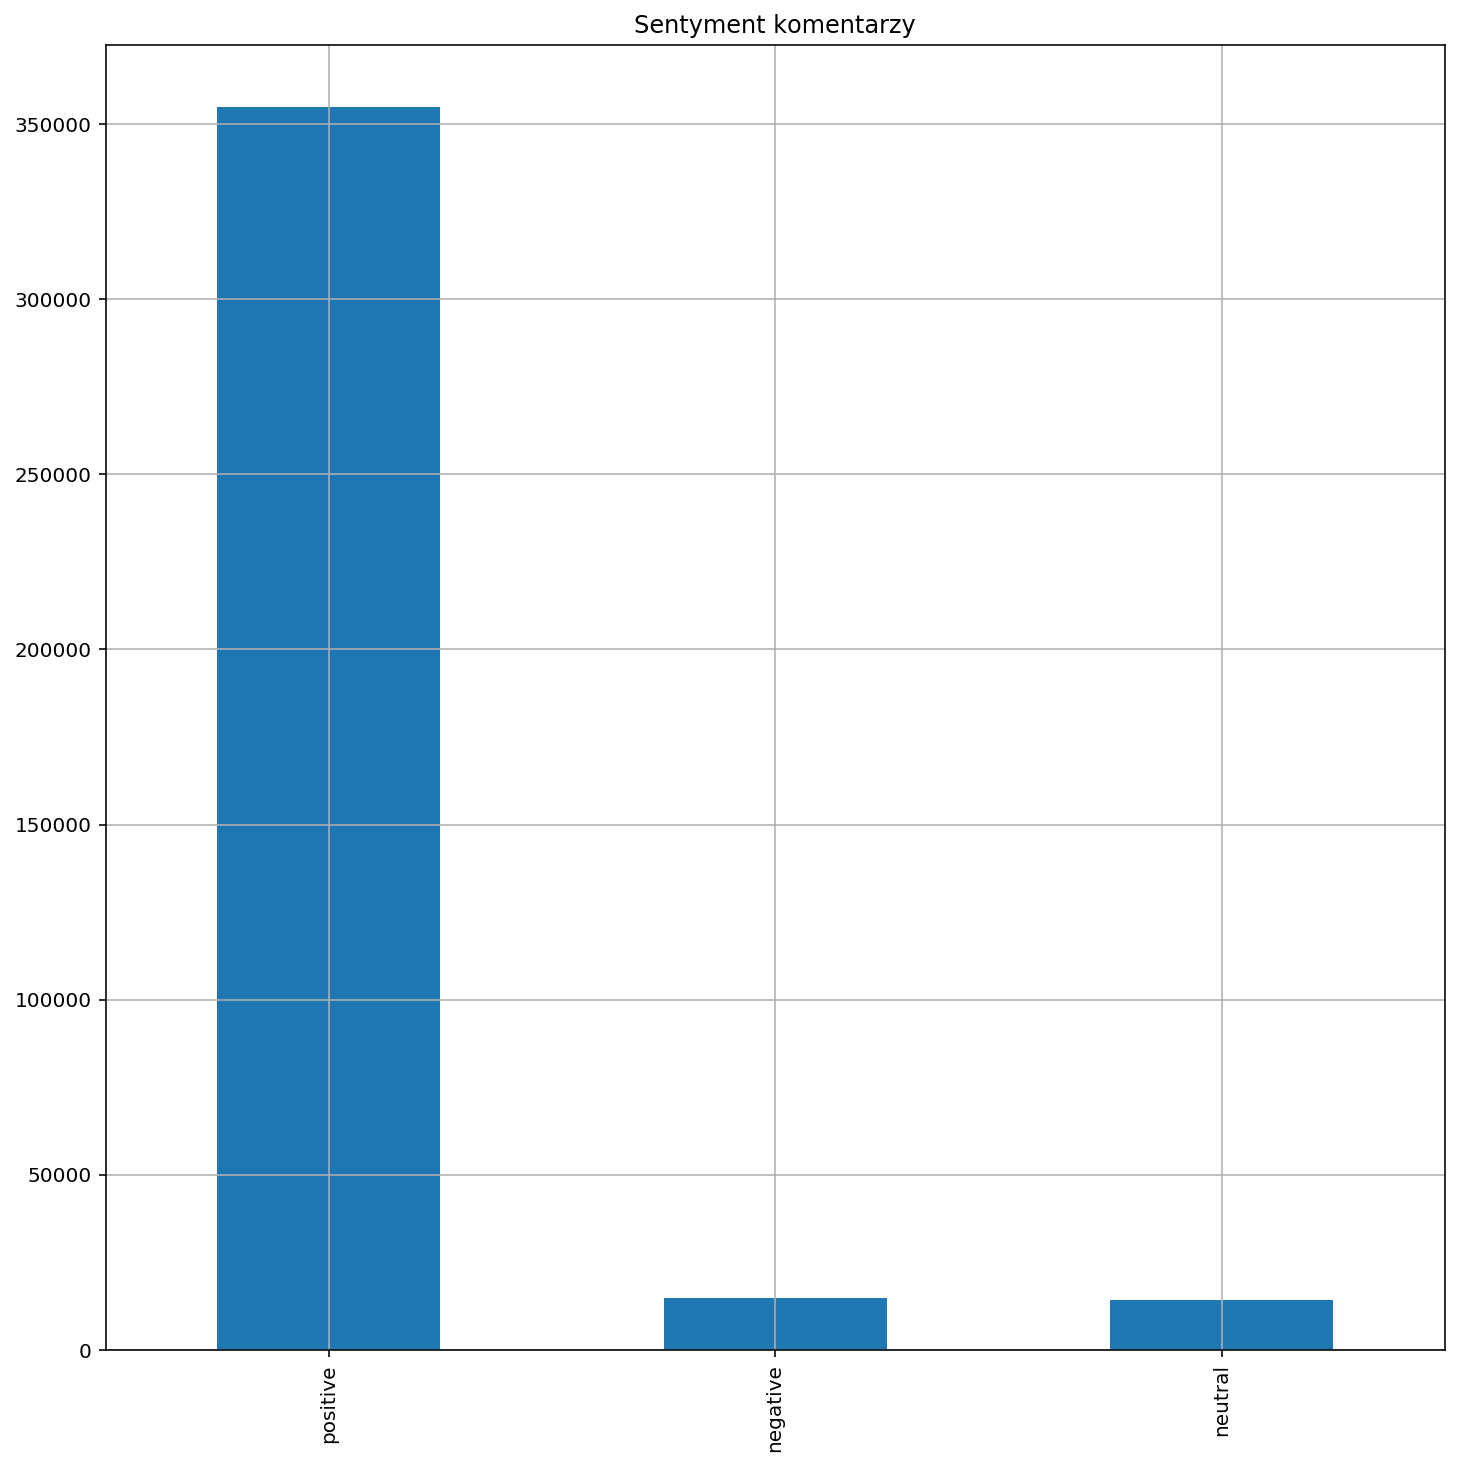

In [184]:
#df.sample(n=20).text.apply(extract_emojis)
df_tmp = df.sample(n=500000)
df_tmp["sentiment"] = df_tmp.text.apply(calc_emojis)
df_tmp.sentiment.value_counts().plot(kind='bar', grid=True, figsize=(12,12))
plt.title('Sentyment komentarzy')
plt.show()